In [ ]:
#TASK-3:Develop a model to predict customer churn for a subscription-
# based service or business. Use historical customer data, including
# features like usage behavior and customer demographics, and try
# algorithms like Logistic Regression, Random Forests, or Gradient
# Boosting to predict churn.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None    
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.drop_duplicates(inplace = True)

In [5]:
data.shape

(10000, 14)

<Axes: xlabel='Exited', ylabel='count'>

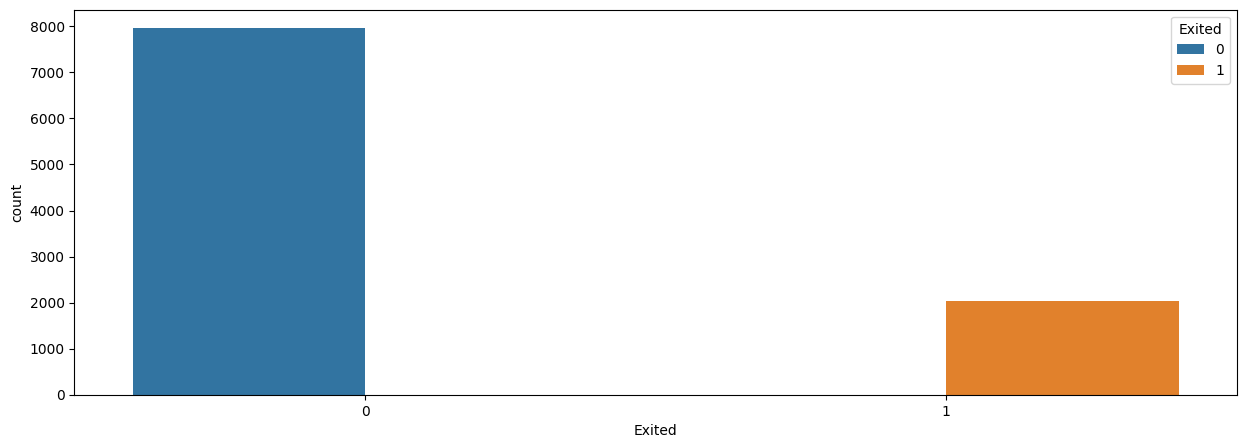

In [6]:
plt.figure(figsize = (15,5), dpi = 100)
sns.countplot(x = 'Exited', hue = 'Exited', data = data)

In [7]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

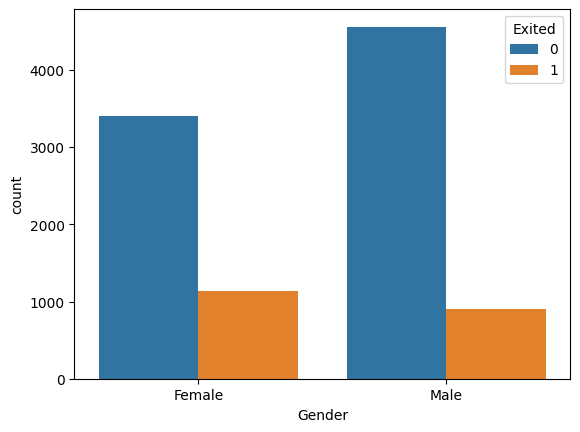

In [9]:
sns.countplot(x='Gender',hue='Exited',data=data)

<Axes: xlabel='Geography', ylabel='count'>

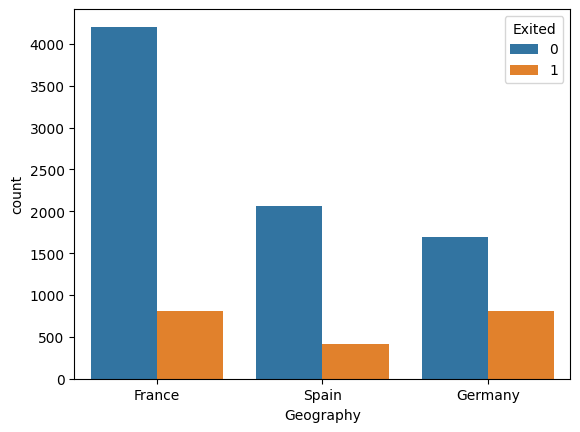

In [10]:
sns.countplot(x='Geography',hue='Exited',data=data)

In [11]:
data = data.drop('CustomerId',axis=1)

In [12]:
data.shape

(10000, 13)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=le.fit_transform(data[column])

In [15]:
data.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1115,228,0,0,24,2,0.000000,0,1,1,101348.880000,1
1,1,1177,217,2,0,23,1,83807.860000,0,0,1,112542.580000,0
2,2,2040,111,0,0,24,8,159660.800000,2,1,0,113931.570000,1
3,3,289,308,0,0,21,1,0.000000,1,0,0,93826.630000,0
4,4,1822,459,2,0,25,2,125510.820000,0,1,1,79084.100000,0


In [16]:
feature = data.drop('Exited', axis = 1)
target = data.Exited

In [17]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
ss = StandardScaler()

In [19]:
x_feature=ss.fit_transform(feature)

In [20]:
x_feature

array([[-1.73187761, -0.46418322, -0.32733113, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.3909112 , -0.44133106, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479,  0.62898807, -1.53987591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.07353887,  0.60539563, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  0.98943914,  1.25830436, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.4692527 ,  1.46557697, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_feature, target, 
                                                    random_state=1, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 12)
y_train (8000,)
X_test (2000, 12)
y_test (2000,)


In [ ]:
# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
predict=lr.predict(X_test)
lr.score(X_test,y_test)

0.8035

In [24]:
from sklearn.metrics import confusion_matrix

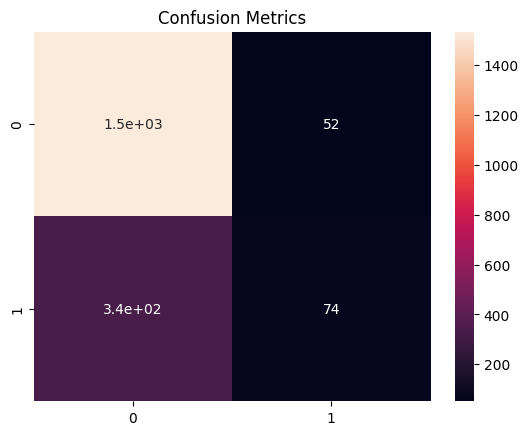

In [25]:
Cm=confusion_matrix(y_test,predict)
ax=plt.axes()
sns.heatmap(Cm, annot=True, annot_kws={'size':10}, ax=ax)
plt.title("Confusion Metrics")
plt.show()

In [ ]:
# Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
pred_train = rf_classifier.predict(X_train)
pred_test  = rf_classifier.predict(X_test)
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.924375
Testing Set Accuracy  :  0.8665


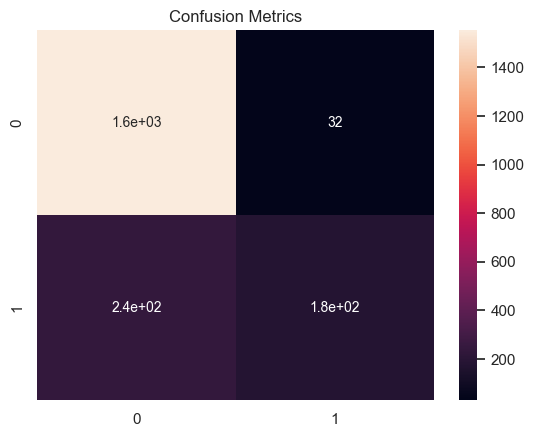

In [33]:
Cm=confusion_matrix(y_test,pred_test)
ax=plt.axes()
sns.heatmap(Cm, annot=True, annot_kws={'size':10}, ax=ax)
plt.title("Confusion Metrics")
plt.show()